# Plott der Parteien
- Alles anhand der Parteien sortieren
- Danach alle Mehrfachnennungen rausschmeissen
- Danach anschauen und anhand der Daten plotten.

In [9]:
%matplotlib inline
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
import requests, zipfile, io #zum abspeichern von PDFs
from tqdm import tqdm # Anzeigen des aktuellen Ladestandes
import PyPDF2
import re
from os import listdir
from os.path import isfile, join
import locale
import matplotlib.pyplot as plt

In [10]:
df_tuti=pd.read_csv("KRFrames/df_tuti_Ganzes_Frame")

In [11]:
df_tuti

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Link Vorstoss-PDF
0,0,3020,Postulat von Luzian Franzini und Esther Haas b...,Luzian Franzini,ALG,2019-10-11,3020-1-16168_Racial-Profiling.pdf
1,1,3020,Postulat von Luzian Franzini und Esther Haas b...,Esther Haas,ALG,2019-10-11,3020-1-16168_Racial-Profiling.pdf
2,2,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Luzian Franzini,ALG,2019-10-11,3019-1-16167_Chancengleichheit.pdf
3,3,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Rita Hofer,ALG,2019-10-11,3019-1-16167_Chancengleichheit.pdf
4,4,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Tabea Zimmermann Gibson,ALG,2019-10-11,3019-1-16167_Chancengleichheit.pdf
...,...,...,...,...,...,...,...
1988,1988,762,Motion der erweiterten Justizprüfungskommissio...,NaN,NaN,2005-10-31,pdoc_1047_1.pdf
1989,1989,666,Motion der Kommission Teilrevision Personalges...,NaN,NaN,2002-06-06,pdoc_55_1.pdf
1990,1990,304,Motion von Manuela Weichelt betreffend HIV-Prä...,Manuela Weichelt,ALG,2003-05-27,pdoc_50_1.pdf
1991,1991,282,Motion von Christoph Hohler betreffend Radstre...,Christoph Hohler,SP,NaN,NaN


In [12]:
# Nun sortieren nach Parteien
df1=df_tuti.sort_values("P")
df1

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Link Vorstoss-PDF
0,0,3020,Postulat von Luzian Franzini und Esther Haas b...,Luzian Franzini,ALG,2019-10-11,3020-1-16168_Racial-Profiling.pdf
733,733,2413,Postulat von Andreas Lustenberger betreffend R...,Andreas Lustenberger,ALG,2014-07-06,14724_2413_1_Wanderwege.pdf
1685,1685,1380,Interpellation der Alternativen Fraktion betre...,Alternativen Fraktion,ALG,2017-02-26,970
1689,1689,1378,"Motion von Hans Christen, Eusebius Spescha, Be...",Martin Stuber,ALG,2005-10-03,pdoc_1011_1.pdf
1692,1692,1375,Interpellation von Jean-Pierre Prodolliet und ...,Stefan Gisler,ALG,2005-09-26,pdoc_1013_1.pdf
...,...,...,...,...,...,...,...
1984,1984,823,Motion der Kommission Parlamentsreform betreff...,NaN,NaN,2005-03-22,pdoc_851_1.pdf
1985,1985,822,Motion der Kommission Parlamentsreform betreff...,NaN,NaN,2005-04-26,pdoc_879_1.pdf
1988,1988,762,Motion der erweiterten Justizprüfungskommissio...,NaN,NaN,2005-10-31,pdoc_1047_1.pdf
1989,1989,666,Motion der Kommission Teilrevision Personalges...,NaN,NaN,2002-06-06,pdoc_55_1.pdf


In [13]:
#Voila, denke das stimmt - es sind rund 800 Vorlagen weniger. Also mehr als ein Drittel weniger.
df2=df1.drop_duplicates(subset=['VorlageNR', 'P'], keep=False)

In [14]:
df2

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Link Vorstoss-PDF
733,733,2413,Postulat von Andreas Lustenberger betreffend R...,Andreas Lustenberger,ALG,2014-07-06,14724_2413_1_Wanderwege.pdf
1685,1685,1380,Interpellation der Alternativen Fraktion betre...,Alternativen Fraktion,ALG,2017-02-26,970
1689,1689,1378,"Motion von Hans Christen, Eusebius Spescha, Be...",Martin Stuber,ALG,2005-10-03,pdoc_1011_1.pdf
1692,1692,1375,Interpellation von Jean-Pierre Prodolliet und ...,Stefan Gisler,ALG,2005-09-26,pdoc_1013_1.pdf
339,339,2753,Interpellation der Fraktion Alternative - die ...,Alternativen Fraktion,ALG,2017-05-31,2753-1-15456_Menschenrechtsverletzungen.pdf
...,...,...,...,...,...,...,...
1984,1984,823,Motion der Kommission Parlamentsreform betreff...,NaN,NaN,2005-03-22,pdoc_851_1.pdf
1985,1985,822,Motion der Kommission Parlamentsreform betreff...,NaN,NaN,2005-04-26,pdoc_879_1.pdf
1988,1988,762,Motion der erweiterten Justizprüfungskommissio...,NaN,NaN,2005-10-31,pdoc_1047_1.pdf
1989,1989,666,Motion der Kommission Teilrevision Personalges...,NaN,NaN,2002-06-06,pdoc_55_1.pdf


In [15]:
df3=df2.head(1141) #Entferne jene ohne Partei

In [43]:
#Hier die Anzahl Nennungen der einzelnen Parteien
df5["P"].value_counts()

CVP    226
SVP    211
ALG    207
SP     180
FDP    138
GLP     41
CSP     16
pl       8
SGA      4
Name: P, dtype: int64

In [29]:
df4=df3.set_index(pd.DatetimeIndex(df3["Einreichedatum"]))
                 


In [30]:
df5=df4.sort_index().head(1031)

In [31]:
df5

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Link Vorstoss-PDF
Einreichedatum,,,,,,,
1982-12-16,1821,1223,"Motion von Karl Betschart, Andrea Hodel und Be...",Beat Villiger,CVP,1982-12-16,pdoc_656_1.pdf
1982-12-16,1819,1223,"Motion von Karl Betschart, Andrea Hodel und Be...",Karl Betschart,SVP,1982-12-16,pdoc_656_1.pdf
1982-12-16,1820,1223,"Motion von Karl Betschart, Andrea Hodel und Be...",Andrea Hodel,FDP,1982-12-16,pdoc_656_1.pdf
1998-01-29,1832,1201,Motion der FDP-Fraktion betreffend Einführungs...,FDP-Fraktion,FDP,1998-01-29,pdoc_620_1.pdf
1998-10-27,1951,1016,Postulat von René Bär betreffend Ungültigerklä...,René Bär,SVP,1998-10-27,pdoc_131_1.pdf
...,...,...,...,...,...,...,...
2019-08-10,39,3002,"Interpellation von Hans Baumgartner, Manuela K...",Claus Soltermann,GLP,2019-08-10,3002-1-16129_Kiesabbau.pdf
2019-08-16,27,3004,Motion der CVP-Fraktion betreffend bedarfsgere...,CVP-Fraktion,CVP,2019-08-16,3004-1-16133_Tagesschulen.pdf
2019-09-08,24,3007,Interpellation der SP-Fraktion betreffend Pest...,SP-Fraktion,SP,2019-09-08,3007-1-16142_Trinkwasser.pdf


In [15]:
df5=df4.head(1031)

In [46]:
df5["P"].value_counts() # scheint einigermassen verteilt zu sein

CVP    226
SVP    211
ALG    207
SP     180
FDP    138
GLP     41
CSP     16
pl       8
SGA      4
Name: P, dtype: int64

In [52]:
df_pa=df5["P"]#ich versuchs mal mit nur den parteien und den Daten
df_pa

Einreichedatum
1982-12-16    CVP
1982-12-16    SVP
1982-12-16    FDP
1998-01-29    FDP
1998-10-27    SVP
             ... 
2019-08-10    GLP
2019-08-16    CVP
2019-09-08     SP
2019-09-23     SP
2019-09-26    SVP
Name: P, Length: 1031, dtype: object

In [ ]:
# Nun gehts ans Plotten - mal schauen ob das geht. 

In [56]:
df_pa.resample("M").count()# das geht nicht - ist fast dasselbe wie bei der gesamtauswertung

Einreichedatum
1982-12-31    3
1983-01-31    0
1983-02-28    0
1983-03-31    0
1983-04-30    0
             ..
2019-05-31    9
2019-06-30    4
2019-07-31    7
2019-08-31    3
2019-09-30    3
Freq: M, Name: P, Length: 442, dtype: int64

In [110]:
# Ich versuche es mal mit en parteien einzeln
df_umgekehrt=df5.groupby("P").resample("M").count().unstack()
df_umgekehrt

Unnamed: 0                                              \
Einreichedatum 1982-12-31 1983-01-31 1983-02-28 1983-03-31 1983-04-30   
P                                                                       
ALG                   NaN        NaN        NaN        NaN        NaN   
CSP                   NaN        NaN        NaN        NaN        NaN   
CVP                   1.0        0.0        0.0        0.0        0.0   
FDP                   1.0        0.0        0.0        0.0        0.0   
GLP                   NaN        NaN        NaN        NaN        NaN   
SGA                   NaN        NaN        NaN        NaN        NaN   
SP                    NaN        NaN        NaN        NaN        NaN   
SVP                   1.0        0.0        0.0        0.0        0.0   
pl                    NaN        NaN        NaN        NaN        NaN   

                                                                       ...  \
Einreichedatum 1983-05-31 1983-06-30 1983-07-31 1983-08-31 1983-09-30  ...   
P                                                                      ...   
ALG                   NaN        NaN        NaN        NaN        NaN  ...   
CSP                   NaN        NaN        NaN        NaN        NaN  ...   
CVP                   0.0        0.0        0.0        0.0        0.0  ...   
FDP                   0.0        0.0        0.0        0.0        0.0  ...   
GLP                   NaN        NaN        NaN        NaN        NaN  ...   
SGA                   NaN        NaN        NaN        NaN        NaN  ...   
SP                    NaN        NaN        NaN        NaN        NaN  ...   
SVP                   0.0        0.0        0.0        0.0        0.0  ...   
pl                    NaN        NaN        NaN        NaN        NaN  ...   

               Link Vorstoss-PDF                                              \
Einreichedatum        2018-12-31 2019-01-31 2019-02-28 2019-03-31 2019-04-30   
P                                                                              
ALG                          0.0        1.0        1.0        1.0        2.0   
CSP                          0.0        1.0        2.0        NaN        NaN   
CVP                          0.0        0.0        0.0        1.0        2.0   
FDP                          0.0        1.0        0.0        0.0        2.0   
GLP                          0.0        1.0        0.0        1.0        0.0   
SGA                          NaN        NaN        NaN        NaN        NaN   
SP                           1.0        1.0        0.0        1.0        0.0   
SVP                          1.0        1.0        2.0        2.0        3.0   
pl                           NaN        NaN        NaN        NaN        NaN   

                                                                       
Einreichedatum 2019-05-31 2019-06-30 2019-07-31 2019-08-31 2019-09-30  
P                                                                      
ALG                   1.0        1.0        1.0        NaN        NaN  
CSP                   NaN        NaN        NaN        NaN        NaN  
CVP                   2.0        0.0        2.0        1.0        NaN  
FDP                   0.0        0.0        3.0        NaN        NaN  
GLP                   0.0        1.0        0.0        1.0        NaN  
SGA                   NaN        NaN        NaN        NaN        NaN  
SP                    5.0        2.0        1.0        1.0        2.0  
SVP                   1.0        0.0        0.0        0.0        1.0  
pl                    NaN        NaN        NaN        NaN        NaN  

[9 rows x 3094 columns]

In [112]:
df_umge=df_umgekehrt[["Unnamed: 0"]]
df_umge# Huuuhuu, das könnt noch schwierig werden.

Unnamed: 0                                              \
Einreichedatum 1982-12-31 1983-01-31 1983-02-28 1983-03-31 1983-04-30   
P                                                                       
ALG                   NaN        NaN        NaN        NaN        NaN   
CSP                   NaN        NaN        NaN        NaN        NaN   
CVP                   1.0        0.0        0.0        0.0        0.0   
FDP                   1.0        0.0        0.0        0.0        0.0   
GLP                   NaN        NaN        NaN        NaN        NaN   
SGA                   NaN        NaN        NaN        NaN        NaN   
SP                    NaN        NaN        NaN        NaN        NaN   
SVP                   1.0        0.0        0.0        0.0        0.0   
pl                    NaN        NaN        NaN        NaN        NaN   

                                                                       ...  \
Einreichedatum 1983-05-31 1983-06-30 1983-07-31 1983-08-31 1983-09-30  ...   
P                                                                      ...   
ALG                   NaN        NaN        NaN        NaN        NaN  ...   
CSP                   NaN        NaN        NaN        NaN        NaN  ...   
CVP                   0.0        0.0        0.0        0.0        0.0  ...   
FDP                   0.0        0.0        0.0        0.0        0.0  ...   
GLP                   NaN        NaN        NaN        NaN        NaN  ...   
SGA                   NaN        NaN        NaN        NaN        NaN  ...   
SP                    NaN        NaN        NaN        NaN        NaN  ...   
SVP                   0.0        0.0        0.0        0.0        0.0  ...   
pl                    NaN        NaN        NaN        NaN        NaN  ...   

                                                                       \
Einreichedatum 2018-12-31 2019-01-31 2019-02-28 2019-03-31 2019-04-30   
P                                                                       
ALG                   0.0        1.0        1.0        1.0        2.0   
CSP                   0.0        1.0        2.0        NaN        NaN   
CVP                   0.0        0.0        0.0        1.0        2.0   
FDP                   0.0        1.0        0.0        0.0        2.0   
GLP                   0.0        1.0        0.0        1.0        0.0   
SGA                   NaN        NaN        NaN        NaN        NaN   
SP                    1.0        1.0        0.0        1.0        0.0   
SVP                   1.0        1.0        2.0        2.0        3.0   
pl                    NaN        NaN        NaN        NaN        NaN   

                                                                       
Einreichedatum 2019-05-31 2019-06-30 2019-07-31 2019-08-31 2019-09-30  
P                                                                      
ALG                   1.0        1.0        1.0        NaN        NaN  
CSP                   NaN        NaN        NaN        NaN        NaN  
CVP                   2.0        0.0        2.0        1.0        NaN  
FDP                   0.0        0.0        3.0        NaN        NaN  
GLP                   0.0        1.0        0.0        1.0        NaN  
SGA                   NaN        NaN        NaN        NaN        NaN  
SP                    5.0        2.0        1.0        1.0        2.0  
SVP                   1.0        0.0        0.0        0.0        1.0  
pl                    NaN        NaN        NaN        NaN        NaN  

[9 rows x 442 columns]

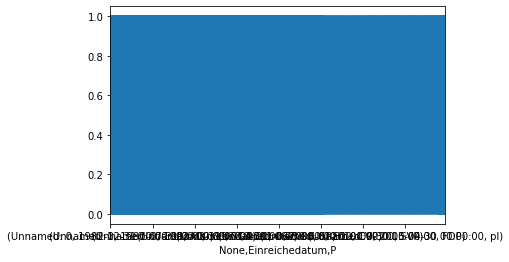

In [119]:
df_umge.groupby('P').count().unstack().plot()

# Die Ergebnisse der einzelnen Parteien
Jedoch noch einzeln

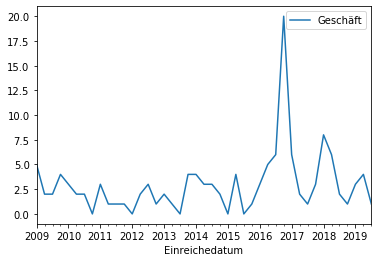

In [91]:
dfalg=df5[df5["P"].str.contains("ALG")]
dfalgz=dfalg[["Geschäft"]]
dfalgz["2009":].resample("Q").count().plot()

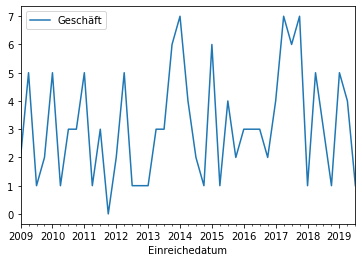

In [97]:
dfsvp=df5[df5["P"].str.contains("SVP")]
dfsvpz=dfsvp[["Geschäft"]]
dfsvpz["2009":].resample("Q").count().plot()

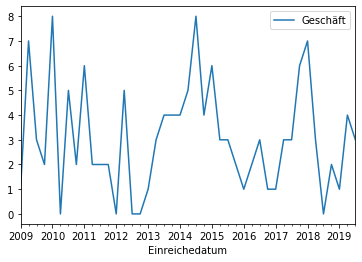

In [93]:
dfcvp=df5[df5["P"].str.contains("CVP")]
dfcvpz=dfcvp[["Geschäft"]]
dfcvpz["2009":].resample("Q").count().plot()

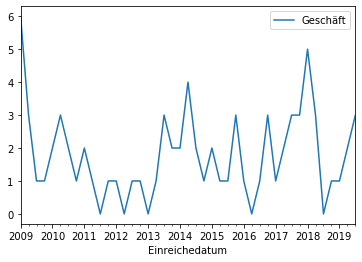

In [94]:
dffdp=df5[df5["P"].str.contains("FDP")]
dffdpz=dffdp[["Geschäft"]]
dffdpz["2009":].resample("Q").count().plot()

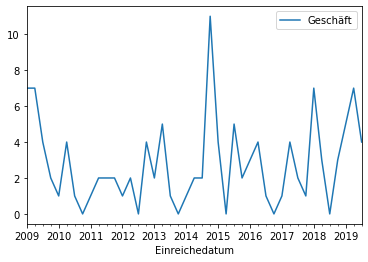

In [95]:
dfsp=df5[df5["P"].str.contains("SP")]
dfspz=dfsp[["Geschäft"]]
dfspz["2009":].resample("Q").count().plot()

# Nun müsste ich diese zusammenführen
aber wie nur - geht es wenn ich die Frames einzeln abspeichere?

In [103]:
svp=dfsvpz["2009":].resample("Q").count()
sp=dfspz["2009":].resample("Q").count()
alg=dfalgz["2009":].resample("Q").count()

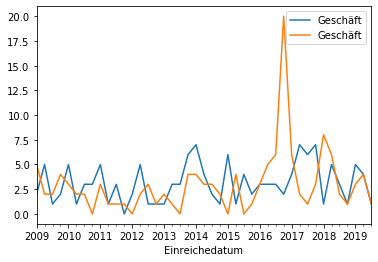

In [104]:
ax = svp.plot()
alg.plot(ax=ax) #zwei zusammen. ok vielleicht noch mit unstack